In [1]:
import numpy as np 
import matplotlib.pyplot as plt 


In [48]:
H = 1
R = 10
Ny = 20
Nx = (R//H)*Ny

x = np.linspace(-R,R,Nx)
y = np.linspace(-H,H,Ny)
y_w = np.linspace(-2*H,2*H,Ny)
X_w, Y_w = np.meshgrid(x,y_w) 
X, Y = np.meshgrid(x,y)

k = 4.
l = 2*np.pi/k


alfa = np.arcsin(l/2*H)

# Z = np.exp(1j*k*X)

d_up = np.array( [np.cos(alfa), np.sin(alfa)])
d_down = np.array( [np.cos(alfa), -np.sin(alfa)])

Z_up = np.exp(1j*k*(d_up[0]*X+d_up[1]*Y))
Z_up_w = np.exp(1j*k*(d_up[0]*X_w+d_up[1]*Y_w))

Z_down = np.exp(1j*k*(d_down[0]*X+d_down[1]*Y))
Z_down_w = np.exp(1j*k*(d_down[0]*X_w+d_down[1]*Y_w))

Z_exact = np.cos(np.pi*Y/H)*np.exp(1j*(np.sqrt(k**2 - (np.pi/H)**2))*X)


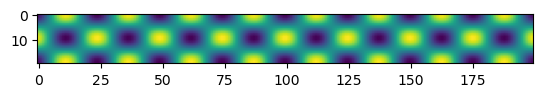

In [47]:
plt.imshow(np.real(Z_up+Z_down))

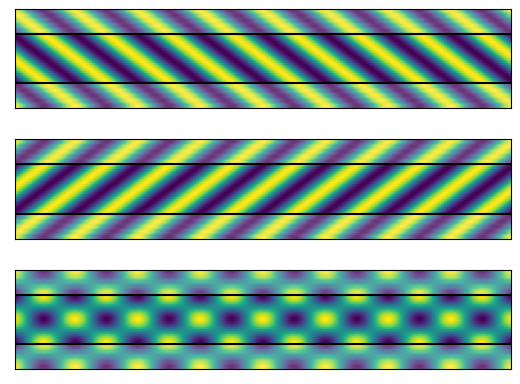

In [62]:
def plot_field(Z,Z_w, ax=None, title=None,):
    if ax is None:
        _, ax = plt.subplots()
    
    ax.imshow(np.real(Z_w), origin='lower', extent=[-R,R,-2*H,2*H], alpha=0.8)
    ax.imshow(np.real(Z), origin='lower', extent=[-R,R,-H,H] )
    ax.set_ylim([-2*H,2*H])
    ax.hlines([-H,H],-R,R,colors='k')
    ax.set_xticks([])
    ax.set_yticks([])
    if title:
        ax.set_title(title)
    
fig, ax = plt.subplots(nrows=3)

plot_field(Z_up,Z_up_w, ax[0])
plot_field(Z_down,Z_down_w, ax[1])
plot_field(0.5*(Z_up+Z_down),0.5*(Z_up_w+Z_down_w), ax[2])
